# SPOT Kriging in 100 Dimensions: Nyström Approximation vs. Exact (Ackley Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 100-dimensional Ackley function.

We use a maximum of 500 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 100D Ackley Function

In [2]:
# do not change, these are given by the organizers
dim = 100
lower = np.full(dim, -32.768)
upper = np.full(dim, 32.768)
fun = Analytical().fun_ackley
fun_evals = 500
max_time =  60

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = 100
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-6
seed = 321
max_surrogate_points = 100
min_Lambda = -1
max_Lambda = 1
min_theta = -4
max_theta = 3
isotropic = True

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_03_00_42_56_0
Created spot_tensorboard_path: runs/spot_logs/000_maans08_2025-11-03_00-42-56 for SummaryWriter()


spotpython tuning: 21.00369401947787 [##--------] 20.20% 
spotpython tuning: 20.887847879212334 [##--------] 20.40% 
spotpython tuning: 20.887847879212334 [##--------] 20.60% 
spotpython tuning: 20.887847879212334 [##--------] 20.80% 
spotpython tuning: 20.786677897047202 [##--------] 21.00% 
spotpython tuning: 20.747938015435437 [##--------] 21.20% 
spotpython tuning: 20.747938015435437 [##--------] 21.40% 
spotpython tuning: 20.747938015435437 [##--------] 21.60% 
spotpython tuning: 20.721682364267366 [##--------] 21.80% 
spotpython tuning: 20.721682364267366 [##--------] 22.00% 
spotpython tuning: 20.721682364267366 [##--------] 22.20% 
spotpython tuning: 20.721682364267366 [##--------] 22.40% 
spotpython tuning: 20.721682364267366 [##--------] 22.60% 
spotpython tuning: 20.642098365913828 [##--------] 22.80% 
spotpython tuning: 20.642098365913828 [##--------] 23.00% 
spotpython tuning: 20.642098365913828 [##--------] 23.20% 
spotpython tuning: 20.4755308392736 [##--------] 23.40% 


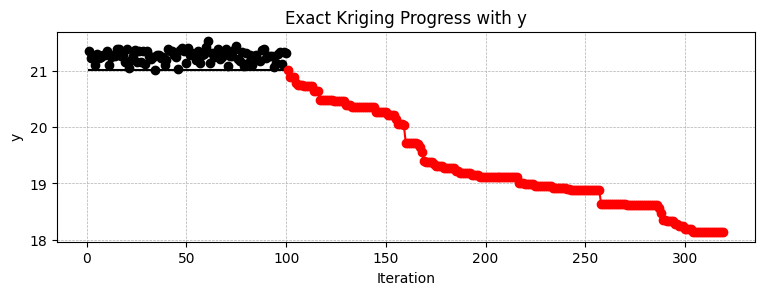

In [5]:
try:
    spot_exact_y = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_y.run()
    exact_success_y = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_y = False
if exact_success_y:
    spot_exact_y.plot_progress(log_y=False, title="Exact Kriging Progress with y")

## Regression  and  Expected Improvement as Infill Criterion

In [6]:
infill_criterion = "ei"

In [7]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method,min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_maans08_2025-11-03_01-43-20 for SummaryWriter()


spotpython tuning: 20.437296937511572 [##--------] 20.20% 
spotpython tuning: 20.312727259682504 [##--------] 20.40% 
spotpython tuning: 20.145477712891463 [##--------] 20.60% 
spotpython tuning: 20.145477712891463 [##--------] 20.80% 
spotpython tuning: 20.145477712891463 [##--------] 21.00% 
spotpython tuning: 20.145477712891463 [##--------] 21.20% 
spotpython tuning: 20.145477712891463 [##--------] 21.40% 
spotpython tuning: 19.75473960315498 [##--------] 21.60% 
spotpython tuning: 19.75473960315498 [##--------] 21.80% 
spotpython tuning: 19.75473960315498 [##--------] 22.00% 
spotpython tuning: 19.75473960315498 [##--------] 22.20% 
spotpython tuning: 19.75473960315498 [##--------] 22.40% 
spotpython tuning: 19.75473960315498 [##--------] 22.60% 
spotpython tuning: 19.39276093450472 [##--------] 22.80% 
spotpython tuning: 19.39276093450472 [##--------] 23.00% 
spotpython tuning: 19.39276093450472 [##--------] 23.20% 
spotpython tuning: 19.39276093450472 [##--------] 23.40% 
spotpyt

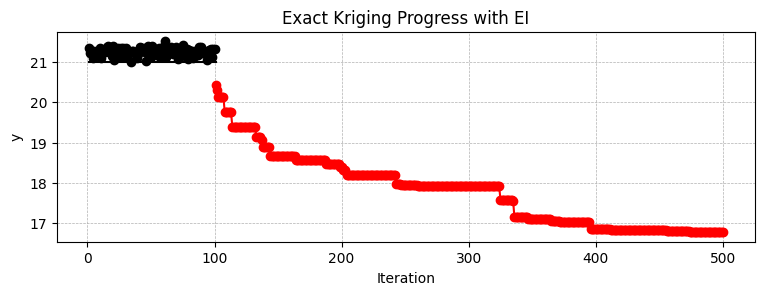

In [8]:
try:
    spot_exact_ei = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_ei.run()
    exact_success_ei = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_ei = False
if exact_success_ei:
    spot_exact_ei.plot_progress(log_y=False, title="Exact Kriging Progress with EI")

## Regression and y with Nyström Kriging

In [9]:
use_nystrom = True
nystrom_m = 30
infill_criterion = "y"

In [10]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta,isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_maans08_2025-11-03_02-21-55 for SummaryWriter()


spotpython tuning: 20.97476373848855 [##--------] 20.20% 
spotpython tuning: 20.97476373848855 [##--------] 20.40% 
spotpython tuning: 20.97476373848855 [##--------] 20.60% 
spotpython tuning: 20.97476373848855 [##--------] 20.80% 
spotpython tuning: 20.97476373848855 [##--------] 21.00% 
spotpython tuning: 20.97476373848855 [##--------] 21.20% 
spotpython tuning: 20.97476373848855 [##--------] 21.40% 
spotpython tuning: 20.97476373848855 [##--------] 21.60% 
spotpython tuning: 20.97476373848855 [##--------] 21.80% 
spotpython tuning: 20.97476373848855 [##--------] 22.00% 
spotpython tuning: 20.97476373848855 [##--------] 22.20% 
spotpython tuning: 20.97476373848855 [##--------] 22.40% 
spotpython tuning: 20.97476373848855 [##--------] 22.60% 
spotpython tuning: 20.97476373848855 [##--------] 22.80% 
spotpython tuning: 20.97476373848855 [##--------] 23.00% 
spotpython tuning: 20.97476373848855 [##--------] 23.20% 
spotpython tuning: 20.97476373848855 [##--------] 23.40% 
spotpython tun

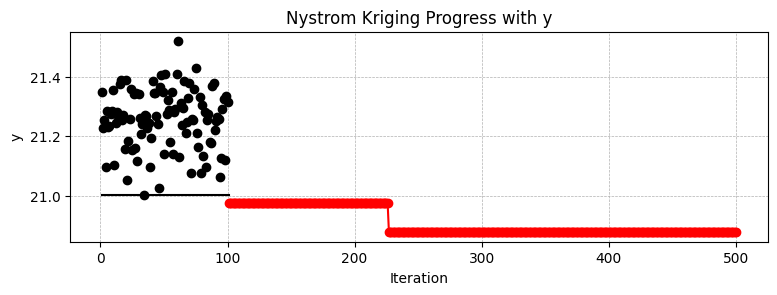

In [11]:
spot_nystrom_y = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_y.run()
spot_nystrom_y.plot_progress(log_y=False, title="Nystrom Kriging Progress with y")

## Regression and ei with Nyström Kriging

In [12]:
infill_criterion = "ei"

In [13]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_maans08_2025-11-03_02-24-27 for SummaryWriter()


spotpython tuning: 20.97476373848855 [##--------] 20.20% 
spotpython tuning: 20.97476373848855 [##--------] 20.40% 
spotpython tuning: 20.97476373848855 [##--------] 20.60% 
spotpython tuning: 20.97476373848855 [##--------] 20.80% 
spotpython tuning: 20.97476373848855 [##--------] 21.00% 
spotpython tuning: 20.97476373848855 [##--------] 21.20% 
spotpython tuning: 20.97476373848855 [##--------] 21.40% 
spotpython tuning: 20.97476373848855 [##--------] 21.60% 
spotpython tuning: 20.97476373848855 [##--------] 21.80% 
spotpython tuning: 20.97476373848855 [##--------] 22.00% 
spotpython tuning: 20.97476373848855 [##--------] 22.20% 
spotpython tuning: 20.97476373848855 [##--------] 22.40% 
spotpython tuning: 20.97476373848855 [##--------] 22.60% 
spotpython tuning: 20.97476373848855 [##--------] 22.80% 
spotpython tuning: 20.97476373848855 [##--------] 23.00% 
spotpython tuning: 20.97476373848855 [##--------] 23.20% 
spotpython tuning: 20.97476373848855 [##--------] 23.40% 
spotpython tun

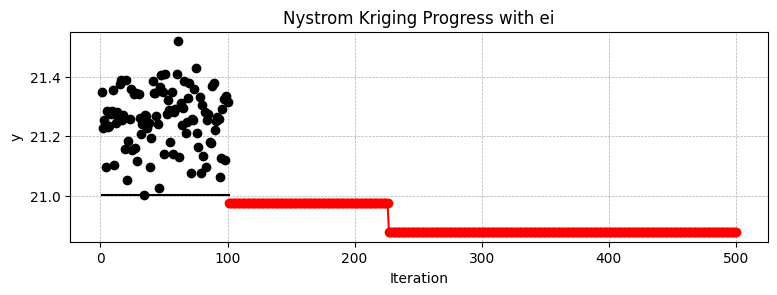

In [14]:
spot_nystrom_ei = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_ei.run()
spot_nystrom_ei.plot_progress(log_y=False, title="Nystrom Kriging Progress with ei")

## Compare Minimum Found

In [15]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_y.min_y:.4f} at x = {spot_exact_y.min_X}")
print(f"[6D] Exact Kriging ei: min y = {spot_exact_ei.min_y:.4f} at x = {spot_exact_ei.min_X}")
print(f"[6D] Nyström Kriging y: min y = {spot_nystrom_y.min_y:.4f} at x = {spot_nystrom_y.min_X}")
print(f"[6D] Nyström Kriging ei: min y = {spot_nystrom_ei.min_y:.4f} at x = {spot_nystrom_ei.min_X}")

[6D] Exact Kriging y: min y = 18.1371 at x = [ -5.52177515 -11.09169721   1.39666872 -14.25796763  -3.04953233
   2.81255202   3.54896349   9.80238327   9.97807929   2.17233393
   9.99400409   3.77044916  -4.44810345   6.91789631   3.66833332
   9.18221578  11.12468499  -2.8944771   -4.49905163  11.9057722
  -7.38630158  -3.07269971   3.44219524  -2.01738496 -21.73844948
  -3.90697461  13.56543586  13.11257866   7.23218789  -7.44087661
  -4.70122812 -11.99590408  14.24000646 -14.75935244  -2.09783424
  14.76801756  -9.03125694  17.29922785  -7.73800422  -6.81542768
   6.07268326   3.67841154   4.45236561  -0.86610721  -2.78893484
   0.74327681  13.7599782    5.9631386   -0.11613008  -8.53625976
  21.51045581  -6.207462   -11.08928608   3.30098993   5.16435618
  12.64960182 -15.98382792  -6.4717276   -5.29483429   4.15783162
  -8.8698764   11.66759785  -2.36694681  -1.00170567   0.31948212
  -2.98051254   9.47919888  -8.10807034   6.50020223  -9.7545529
  -5.02876998   0.30836549 -13.89

In [16]:
spot_exact_y.plot_important_hyperparameter_contour(max_imp=3)

Importance requires more than one theta value (n_theta>1).
